<center><h1><b> Supply Chain Optimization

<h1>Importing the Dataset

In [1]:
import pandas as pd
import dateutil.parser
import numpy as np
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px

In [2]:
df= pd.read_csv("../input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv", encoding_errors="ignore")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Missing values

In [3]:
df.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


* Customer Zipcode: 3 missing values.
* Order Zipcode: 155,679 missing values; not critical due to other location features.
* Product Description: All values are missing; drop the column.
* Customer LName: 8 missing values; not significant since Customer Id is used.
* All other columns have no missing values.

In [4]:
df.drop("Product Description",axis=1,inplace=True)
df.drop("Order Zipcode",axis=1,inplace=True)

# Let's see unique values for categorical columns

In [5]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastn,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastn,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Shanghi,CLOSED,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Osaka,COMPLETE,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Australia del Sur,PENDING,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,Australia del Sur,PENDING_PAYMENT,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [6]:
numerical_features = [f for f in df.columns if df[f].dtypes!='O']
cat_features = [c for c in df.columns if df[c].dtypes=='O']
print("Numerical: ",numerical_features)
print(" ")
print("Categorical: ",cat_features)

Numerical:  ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price', 'Product Status']
 
Categorical:  ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Image', 'Product Name', 'shipping date (DateOrders)', 'Ship

In [7]:
for column in cat_features:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")

Column: Type
Unique Values: ['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']

Column: Delivery Status
Unique Values: ['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']

Column: Category Name
Unique Values: ['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games']

Column: Customer C

In [8]:
df['Customer Full Name'] = df['Customer Fname'].astype(str)+df['Customer Lname'].astype(str)

df.drop("Customer Email",axis=1,inplace=True)
df.drop("Customer Fname",axis=1,inplace=True)
df.drop("Customer Lname",axis=1,inplace=True)
df.drop("Customer Password",axis=1,inplace=True)
df.drop("Product Image", axis=1,inplace=True)

In [9]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastn,PENDING,1360,73,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastn,CLOSED,1360,73,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Shanghi,CLOSED,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class,MariaPeterson
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Osaka,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class,RonaldClark
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Australia del Sur,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class,JohnSmith
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,Australia del Sur,PENDING_PAYMENT,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class,MarySmith


In [10]:
new_df = df

# Converting Date Columns to datetime objects

In [11]:
df["order date (DateOrders)"]=pd.to_datetime(df["order date (DateOrders)"])
df["shipping date (DateOrders)"]=pd.to_datetime(df["shipping date (DateOrders)"])
df=df.sort_values(by="order date (DateOrders)")

# Data Visualization

In [12]:
import plotly.express as px

grouped_data = df.groupby('Category Name')['Sales'].sum().reset_index()

fig = px.bar(grouped_data, x='Category Name', y='Sales', title='Aggregate Sales by Category')

fig.show()

**We can see that Fishing category has the highest aggregate sales. Lets see it sales over time**

In [13]:
Category_Name=df.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(Category_Name, y='Number of Orders',x = 'Category Name',color ='Number of Orders')


In [14]:
geographical = df.groupby(['Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by='Profit of Orders', ascending=False)
print(geographical.head())

geographical_with_coords = geographical.merge(
    df[['Order Country', 'Order City', 'Latitude', 'Longitude']].drop_duplicates(),
    on=['Order Country', 'Order City'],
    how='left'  # Use a left join to keep all rows from the geographical DataFrame
)

print(geographical_with_coords.head())
geographical_with_coords_unique = geographical_with_coords.drop_duplicates(
    subset=['Order Country', 'Order City'],
    keep='first'  # Keep the first occurrence of each unique pair
)

print(geographical_with_coords_unique.head())

fig = px.choropleth(
    geographical, 
    locationmode='country names',
    locations='Order Country',
    color='Profit of Orders',
    hover_name='Order Country',
    color_continuous_scale=px.colors.sequential.YlOrRd
)

highlight_points = geographical_with_coords_unique.loc[
    ((geographical_with_coords_unique['Order Country'].str.lower() == 'repblica dominicana'.lower()) &
    (geographical_with_coords_unique['Order City'].str.lower() == 'santo domingo'.lower())) | 
    ((geographical_with_coords_unique['Order Country'].str.lower() == 'estados unidos'.lower()) &
    (geographical_with_coords_unique['Order City'].str.lower() == 'new york city'.lower()))
]

print(highlight_points)

highlight_scatter = px.scatter_geo(
    highlight_points,
    lat='Latitude',
    lon='Longitude',
    text='Profit of Orders',
    size='Profit of Orders',
    size_max=10,
    color_discrete_sequence=['red']
)


# Add the scatter plot to the choropleth map
fig.add_trace(highlight_scatter.data[0])

# Show the combined plot
fig.show()

            Order Country     Order City  Profit of Orders
3260  Repblica Dominicana  Santo Domingo      51111.670019
1492       Estados Unidos  New York City      47889.759868
2152             Honduras    Tegucigalpa      40973.640056
1431       Estados Unidos    Los Angeles      38014.360024
2841            Nicaragua        Managua      34319.950107
         Order Country     Order City  Profit of Orders   Latitude   Longitude
0  Repblica Dominicana  Santo Domingo      51111.670019  40.763580  -73.830040
1  Repblica Dominicana  Santo Domingo      51111.670019  18.265211  -66.370552
2  Repblica Dominicana  Santo Domingo      51111.670019  29.384306 -100.750252
3  Repblica Dominicana  Santo Domingo      51111.670019  40.659874 -112.002869
4  Repblica Dominicana  Santo Domingo      51111.670019  18.285450  -66.370621
            Order Country     Order City  Profit of Orders   Latitude  \
0     Repblica Dominicana  Santo Domingo      51111.670019  40.763580   
694        Estados Unidos 

In [15]:
market = df.groupby('Market')
region = df.groupby('Order Region')

fig1 = px.bar(
    market['Sales per customer'].sum().sort_values(ascending=False).reset_index(),
    x='Market',
    y='Sales per customer',
    title="Total sales for all markets",
    labels={'Sales per customer': 'Total Sales'},
    template='plotly_dark',
    width=800,
    height=600
)
fig1.show()

region_sales_per_customer = region['Sales per customer'].sum().sort_values(ascending=False).reset_index()

fig2 = px.bar(
    region_sales_per_customer,
    x='Order Region',
    y='Sales per customer',
    title="Total sales for all regions",
    labels={'Sales per customer': 'Total Sales'},
    template='plotly_dark',
    width=800,
    height=600
)
fig2.show()


In [16]:
import plotly.express as px
loss = df[df['Benefit per order'] < 0]
loss_by_category = loss['Category Name'].value_counts().nlargest(10).reset_index()
loss_by_category.columns = ['Category Name', 'Count']
fig1 = px.bar(
    loss_by_category,
    x='Category Name',
    y='Count',
    title='Products with Most Loss',
    labels={'Category Name': 'Product Category', 'Count': 'Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig1.show()

loss_by_region = loss['Order Region'].value_counts().nlargest(10).reset_index()
loss_by_region.columns = ['Order Region', 'Count']
fig2 = px.bar(
    loss_by_region,
    x='Order Region',
    y='Count',
    title='Regions with Most Loss',
    labels={'Order Region': 'Region', 'Count': 'Count'},
    template='plotly_dark',
    width=800,
    height=600
)

fig2.show()

total_loss = loss['Benefit per order'].sum()
print("Total loss: ", total_loss)

Total loss:  -3883547.345768667


**Loss may be due to late deliveries and fraud.**

In [17]:
late_delivery_data = df[df['Delivery Status'] == 'Late delivery']
late_by_product = late_delivery_data['Product Name'].value_counts().nlargest(10).reset_index()
late_by_product.columns = ['Product Name', 'Late Deliveries']
fig = px.bar(
    late_by_product,
    x='Product Name',
    y='Late Deliveries',
    title='Top 10 Products with Late Deliveries',
    labels={'Product Name': 'Product', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

In [18]:
late_delivery_data = df[df['Delivery Status'] == 'Late delivery']
late_by_product = late_delivery_data['Category Name'].value_counts().nlargest(10).reset_index()
late_by_product.columns = ['Category Name', 'Late Deliveries']
fig = px.bar(
    late_by_product,
    x='Category Name',
    y='Late Deliveries',
    title='Top 10 Product Categories with Late Deliveries',
    labels={'Category Name': 'Category', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

In [19]:
late_by_region = late_delivery_data['Order Region'].value_counts().nlargest(10).reset_index()
late_by_region.columns = ['Order Region', 'Late Deliveries']
fig = px.bar(
    late_by_region,
    x='Order Region',
    y='Late Deliveries',
    title='Top 10 Regions with Most Late Deliveries',
    labels={'Order Region': 'Region', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',
    width=800,
    height=600
)

# Show the plot
fig.show()

**Lets see which shipment type is used where there are late deliveries**

In [20]:
late_by_region_shipment = late_delivery_data.groupby(['Order Region', 'Shipping Mode']).size().reset_index(name='Late Deliveries')
late_by_region_shipment = late_by_region_shipment.sort_values(by='Late Deliveries', ascending=False)
# Plotting the late deliveries by region and shipment type using Plotly Express bar plot
fig = px.bar(
    late_by_region_shipment,
    x='Order Region',
    y='Late Deliveries',
    color='Shipping Mode',
    barmode='group',
    title='Late Deliveries by Region and Shipment Type',
    labels={'Order Region': 'Region', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',

)

# Show the plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Finding which payment method is used to conduct frauds can be useful to prevent fraud from happening in future**

In [21]:
data=df[(df['Type'] != 'TRANSFER')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
data['Order Region'].value_counts()

Series([], Name: count, dtype: int64)

In [22]:
fraud_data = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]

fraud_by_region = fraud_data['Order Region'].value_counts().reset_index()

fraud_by_region.columns = ['Order Region', 'Count']

fraud_by_region = fraud_by_region.sort_values(by='Count', ascending=False)

fig = px.bar(
    fraud_by_region,
    x='Order Region',
    y='Count',
    title='Regions with Highest Fraud',
    labels={'Order Region': 'Region', 'Count': 'Fraud Count'},
    template='plotly_dark',
    width=800,
    height=600
)

fig.show()


In [23]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fraud1 = df[df['Order Status'] == 'SUSPECTED_FRAUD']
fraud2 = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Order Region'] == 'Western Europe')]

top_fraud_all_regions = fraud1['Category Name'].value_counts().nlargest(10)
top_fraud_western_europe = fraud2['Category Name'].value_counts().nlargest(10)

all_regions_names = top_fraud_all_regions.index
western_europe_names = top_fraud_western_europe.index
common_categories = all_regions_names.union(western_europe_names)

top_fraud_all_regions = top_fraud_all_regions.reindex(common_categories, fill_value=0)
top_fraud_western_europe = top_fraud_western_europe.reindex(common_categories, fill_value=0)

combined_data = pd.concat([top_fraud_all_regions, top_fraud_western_europe], axis=1)
combined_data.columns = ['All Regions', 'Western Europe']
combined_data['Total Fraud'] = combined_data.sum(axis=1)
combined_data = combined_data.sort_values(by='Total Fraud', ascending=False)

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=combined_data.index,
        y=combined_data['All Regions'],
        name="All Regions",
        marker=dict(color='white')
    )
)

fig.add_trace(
    go.Bar(
        x=combined_data.index,
        y=combined_data['Western Europe'],
        name="Western Europe",
        marker=dict(color='blue')
    )
)

fig.update_layout(
    title="Top 10 Products with Highest Fraud Detections",
    xaxis_title="Products",
    yaxis_title="Fraud Count",
    barmode='group',  # This groups the bars for easier comparison
    template='plotly_dark',
    height=600,
    width=1000,
    showlegend=True
)
fig.show()


**Lets see which customers are causing this fraud**

In [24]:
suspected_fraud_data = df[df['Order Status'] == 'SUSPECTED_FRAUD']
fraud_by_customer = suspected_fraud_data['Customer Full Name'].value_counts().nlargest(10).reset_index()
fraud_by_customer.columns = ['Customer Full Name', 'Fraud Count']
fig = px.bar(
    fraud_by_customer,
    x='Customer Full Name',
    y='Fraud Count',
    title='Top 10 Customers Causing Fraud',
    labels={'Customer Full Name': 'Customer', 'Fraud Count': 'Fraud Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

# Numeric values correlation

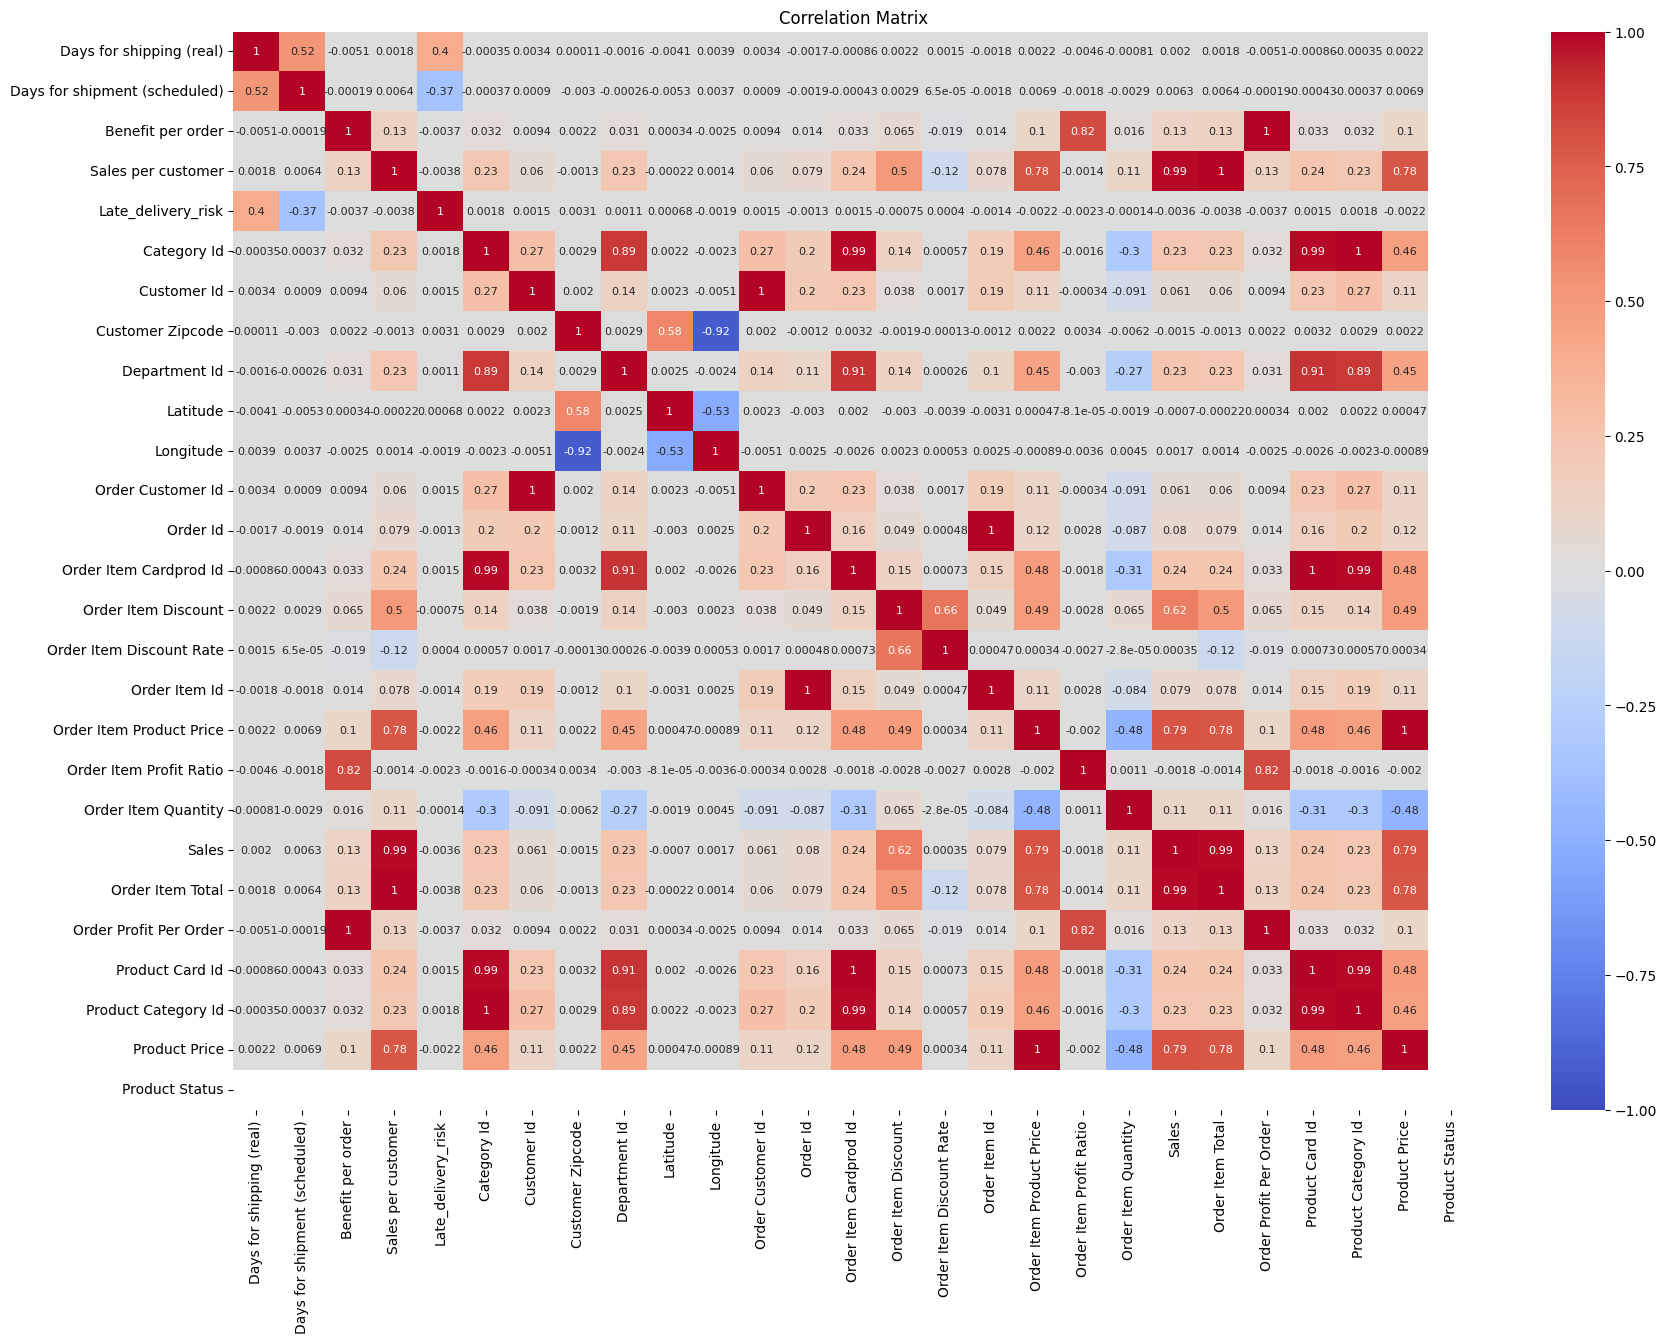

In [25]:
df_numeric = df.select_dtypes(include='number')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

**From the correlation matrix see,**
1. Customer Id          1.0
   Order Customer Id    1.0

2. Sales per customer    1.0
   Order Item Total      1.0

3. Benefit per order         1.0
   Order Profit Per Order    1.0

4. Order Item Cardprod Id    1.0
   Product Card Id           1.0

5. Category Id            1.0
   Product Category Id    1.0

6. Order Item Product Price    1.0
   Product Price               1.0

7. Order Item Id          1.0
   Order Id               1.0

In [26]:
print("Tuple where benefits per order and order profit per order are not equal :"+str(df[df["Benefit per order"]!=df["Order Profit Per Order"]].shape[0]))
print("Tuple where sales per customer and Order Item Total are not equal :"+str(df[df["Sales per customer"]!=df["Order Item Total"]].shape[0]))
print("Tuple where Order Item Cardprod Id and Product Card Id are not equal :"+str(df[df["Order Item Cardprod Id"]!=df["Product Card Id"]].shape[0]))
print("Tuple where Product Price and Order Item Product Price are not equal :"+str(df[df["Product Price"]!=df["Order Item Product Price"]].shape[0]))
print("Tuple where Category Id and Product Category Id are not equal :"+str(df[df["Product Category Id"]!=df["Category Id"]].shape[0]))
print("Tuple where Order Customer Id and Customer Id Product Price are not equal :"+str(df[df["Order Customer Id"]!=df["Customer Id"]].shape[0]))
print("Tuple where Order Item Id and Order Id are not equal :"+str(df[df["Order Item Id"]!=df["Order Id"]].shape[0]))

Tuple where benefits per order and order profit per order are not equal :0
Tuple where sales per customer and Order Item Total are not equal :0
Tuple where Order Item Cardprod Id and Product Card Id are not equal :0
Tuple where Product Price and Order Item Product Price are not equal :0
Tuple where Category Id and Product Category Id are not equal :0
Tuple where Order Customer Id and Customer Id Product Price are not equal :0
Tuple where Order Item Id and Order Id are not equal :180517


Order Item id and order id are unrelated

In [27]:
df[['Order Item Id','Order Id']]

,Order Item Id,Order Id
33833,1,1
77011,2,2
109322,3,2
87884,4,2
114915,8,4
...,...,...
160537,180515,77200
93905,180516,77201
0,180517,77202
52147,180518,77203


In [28]:
df.drop(["Benefit per order","Sales per customer","Order Item Cardprod Id","Order Item Product Price","Product Category Id","Order Customer Id"],axis=1,inplace=True)

In [29]:
unique_values = df["Product Status"].unique()
unique_values

array([0])

Status of the product stock :If it is 1 not available , 0 the product is available  
The unique value in Product status is only 0
that means it is always available ao this column is also not needed

In [30]:
df.drop("Product Status",axis=1,inplace=True)

<h1>Variance Inflation Factor (VIF) to find multi-collinearity between three or more columns:</h1>

Choose Numeric Columns: Focus on the numeric columns in the dataset.

Add Constant: Include a constant column (value of 1) in the DataFrame.

Calculate VIF:

For each numeric column, calculate the VIF using the formula.
Utilize variance_inflation_factor function from statsmodels.
Interpretation:

VIF of 1 indicates no collinearity.
VIF above 5 suggests potential collinearity issues.
Address High VIF:

Consider removing or combining columns with high VIF to reduce collinearity.



In [31]:
vif=pd.DataFrame()
vif["columns"]=['Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order','Product Price']
vif["vif value"] = [variance_inflation_factor(df[['Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order','Product Price']].values, i) for i in range(len(vif["columns"]))]
vif.T

,0,1,2,3,4,5,6,7
columns,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
vif value,389415821.949077,6.126471,3.410618,12.809224,25472272275.347256,20690128715.483124,3.413,24.873511


<h3>several of columns have vif values above 5 and some of them are very high. Such high value usually indicate that value in one column can be derived from values in other columns. Lets look at the data and see if we can find the relation.

In [32]:
df[['Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order','Product Price']].head(5)

,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
33833,60.00,0.20,0.37,1,299.980011,239.979996,88.790001,299.980011
77011,6.00,0.03,0.47,1,199.990005,193.990005,91.180000,199.990005
109322,22.50,0.09,0.30,5,250.000000,227.500000,68.250000,50.000000
87884,22.10,0.17,0.34,1,129.990005,107.889999,36.470001,129.990005
114915,39.98,0.20,0.21,4,199.919998,159.940002,33.590000,49.980000


When you do some basic math you will find these below relationship among these columns:-

* Sales = Product Price * Order Item Quantity
* Order Item Total = Sales - Order Item Discount
* Order Item Discount = Sales * Order Item Discount Rate
* Order Profit Per Order= Order Item Total * Order Item Profit Ratio

These are perfect multi colinear features that shouldn't be passed on to regression models because it affects the performance of the model. You can drop one of the features from each of the above relationship.

In [33]:
df.drop(["Order Item Total","Product Price","Order Item Discount Rate"],axis=1,inplace=True)

In [34]:
vif=pd.DataFrame()
vif["columns"]=['Sales',
                'Order Item Quantity','Order Item Discount','Order Item Profit Ratio']
vif["data"] = [variance_inflation_factor(df[['Sales',
                'Order Item Quantity','Order Item Discount','Order Item Profit Ratio']].values, i) for i in range(len(vif["columns"]))]
vif

,columns,data
0,Sales,4.200158
1,Order Item Quantity,2.124456
2,Order Item Discount,3.068174
3,Order Item Profit Ratio,1.052867


# Inventory Optimization 
The economic order quantity (EOQ) refers to the ideal order quantity a company should purchase in order to minimize its inventory costs, such as holding costs, shortage costs, and order costs.

**Reorder Point Analysis:**  (Daily average sales * average lead time) + safety stock

The reorder point and Economic Order Quantity (EOQ) are interrelated in inventory management in the following ways:

* Reorder point: Determines when to place an order based on demand and delivery time.
* EOQ: Calculates the optimal reorder quantity to minimise total inventory costs, taking into account ordering costs and inventory holding costs.

In [35]:
data = df[['Product Name', 'Sales', 'Days for shipping (real)', 'order date (DateOrders)']].copy()

grouped_data = data.groupby('Product Name').agg({
    'Sales': 'sum',
    'Days for shipping (real)': 'mean',
    'order date (DateOrders)': 'count'  # Use count of order dates as number of days
})

grouped_data['DemandRate'] = grouped_data['Sales'] / grouped_data['order date (DateOrders)']

grouped_data['LeadTime'] = grouped_data['Days for shipping (real)']

data['Date'] = pd.to_datetime(data['order date (DateOrders)'])
data['DailySales'] = data.groupby(['Product Name', data['Date'].dt.date])['Sales'].transform('sum')

std_dev_demand = data.groupby('Product Name')['DailySales'].std()
grouped_data['StdDevDemand'] = std_dev_demand

# Desired service level factor (Z) for a given service level (e.g., 95% service level)
# Typically, Z = 1.96 for 95% service level
Z = 1.96

grouped_data['SafetyStock'] = Z * grouped_data['StdDevDemand'] * np.sqrt(grouped_data['LeadTime'])
grouped_data['ReorderPoint'] = grouped_data['LeadTime'] * grouped_data['DemandRate'] + grouped_data['SafetyStock']
grouped_data[['DemandRate', 'LeadTime', 'StdDevDemand', 'SafetyStock', 'ReorderPoint']]

,DemandRate,LeadTime,StdDevDemand,SafetyStock,ReorderPoint
Product Name,,,,,
Adult dog supplies,84.400002,3.388211,1068.254717,3854.039301,4140.004347
Baby sweater,59.080002,3.149758,997.133404,3468.550020,3654.637755
Bag Boy Beverage Holder,75.686558,3.602151,67.576440,251.380920,524.015297
Bag Boy M330 Push Cart,241.129274,3.391304,152.526816,550.535919,1368.278675
Bowflex SelectTech 1090 Dumbbells,599.989990,3.500000,309.833499,1136.104983,3236.069949
...,...,...,...,...,...
adidas Kids' F5 Messi FG Soccer Cleat,104.302254,3.461832,76.446820,278.784418,639.861304
adidas Men's F10 Messi TRX FG Soccer Cleat,184.690530,3.511475,157.811959,579.616577,1228.152832
adidas Men's Germany Black Crest Away Tee,74.307958,3.692042,69.618091,262.187190,536.535258


<h1>Days for Shipping Prediction

In [36]:
# df = pd.read_csv('/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv',encoding_errors="ignore")

In [37]:
columns_to_drop = ['Customer City', 'Customer Country','Customer State',
                   'Customer Street', 'Department Name', 'Order City',
                   'Order Country', 'order date (DateOrders)','Product Name', 'shipping date (DateOrders)']
new_df = new_df.drop(columns=columns_to_drop)

In [38]:
new_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Price,Product Status,Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,20755,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,327.750000,0,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,19492,...,-249.089996,South Asia,Rajastn,PENDING,1360,73,327.750000,0,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,19491,...,-247.779999,South Asia,Rajastn,CLOSED,1360,73,327.750000,0,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,19490,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,327.750000,0,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,19489,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,327.750000,0,Standard Class,OrliHendricks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,1005,...,40.000000,Eastern Asia,Shanghi,CLOSED,1004,45,399.980011,0,Standard Class,MariaPeterson
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,9141,...,-613.770019,Eastern Asia,Osaka,COMPLETE,1004,45,399.980011,0,Second Class,RonaldClark
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,291,...,141.110001,Oceania,Australia del Sur,PENDING,1004,45,399.980011,0,Standard Class,JohnSmith
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,2813,...,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,1004,45,399.980011,0,Standard Class,MarySmith


In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer Id                    180519 non-null  int64  
 10  Customer Segment               180519 non-null  object 
 11  Customer Zipcode               180516 non-null  float64
 12  Department Id                 

In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_df = new_df.copy()  
for column in new_df.columns:
    if new_df[column].dtype == 'object':  
        encoded_df[column] = label_encoder.fit_transform(new_df[column])

encoded_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Price,Product Status,Shipping Mode,Customer Full Name
0,1,3,4,91.250000,314.640015,0,0,73,40,20755,...,91.250000,15,475,2,1360,73,327.750000,0,3,1876
1,3,5,4,-249.089996,311.359985,1,1,73,40,19492,...,-249.089996,13,841,5,1360,73,327.750000,0,3,5378
2,0,4,4,-247.779999,309.720001,3,0,73,40,19491,...,-247.779999,13,841,1,1360,73,327.750000,0,3,4429
3,1,3,4,22.860001,304.809998,0,0,73,40,19490,...,22.860001,11,835,2,1360,73,327.750000,0,3,12929
4,2,2,4,134.210007,298.250000,0,0,73,40,19489,...,134.210007,11,835,6,1360,73,327.750000,0,3,10638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,3,0,45,18,1005,...,40.000000,7,914,1,1004,45,399.980011,0,3,8426
180515,1,3,2,-613.770019,395.980011,1,1,45,18,9141,...,-613.770019,7,770,2,1004,45,399.980011,0,2,11679
180516,3,5,4,141.110001,391.980011,1,1,45,18,291,...,141.110001,11,88,5,1004,45,399.980011,0,3,6300
180517,2,3,4,186.229996,387.980011,0,0,45,18,2813,...,186.229996,11,88,6,1004,45,399.980011,0,3,9384


In [41]:
encoded_df.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer Id                      0
Customer Segment                 0
Customer Zipcode                 3
Department Id                    0
Latitude                         0
Longitude                        0
Market                           0
Order Customer Id                0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Region        

In [42]:
def custom_mode(column):
    frequency = {}
    for value in column:
        if pd.notnull(value):  
            frequency[value] = frequency.get(value, 0) + 1
    
    max_freq = max(frequency.values())
    mode_values = [key for key, value in frequency.items() if value == max_freq]    
    return mode_values

encoded_df['Customer Zipcode'].fillna(custom_mode(encoded_df['Customer Zipcode'])[0], inplace=True)

/tmp/ipykernel_25/1549210209.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<h1>Outlier Visualization via Boxplots

In [43]:
columns = [
    'Type',
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Market',
    'Order Item Discount',
    'Order Item Profit Ratio',
    'Order Item Quantity',
    'Sales',
    'Order Profit Per Order',
    'Order Status',
]

In [44]:
def mean(data):
    return sum(data) / len(data)

def median(data):
    data = sorted(data)
    n = len(data)
    return (data[n//2 - 1] + data[n//2]) / 2 if n % 2 == 0 else data[n//2]

def mode(data):
    freq = {}
    for x in data:
        freq[x] = freq.get(x, 0) + 1
    max_freq = max(freq.values())
    return [k for k, v in freq.items() if v == max_freq]

def data_range(data):
    return max(data) - min(data)

def five_number_summary(data):
    data = sorted(data)
    n = len(data)
    Q1 = median(data[:n//2])
    Q2 = median(data)
    Q3 = median(data[-(n//2):])
    return min(data), Q1, Q2, Q3, max(data)

def symmetry_and_skewness(data):
    meanf = mean(data)
    medianf = median(data)
    modef = mode(data)[0] if mode(data) else None
    if meanf == medianf == modef:
        return "The distribution is symmetric and not skewed."
    elif meanf > medianf:
        return "The distribution is right and positively skewed."
    elif meanf < medianf:
        return "The distribution is left and negatively skewed."

for column in columns:
    column = column.strip()  
    data = encoded_df[column].dropna().tolist()  

    mean_val = mean(data)
    median_val = median(data)
    mode_val = mode(data)[0] if mode(data)[0] > 1 else data[0]
    range_val = data_range(data)
    five_num_summary = five_number_summary(data)
    data_skewness = symmetry_and_skewness(data)

    print(f"\nStatistics for column: {column}")
    print("Mean:", mean_val)
    print("Median:", median_val)
    print("Mode:", mode_val)
    print("Range:", range_val)
    print("Five Number Summary:", five_num_summary)
    print("Skewness:", data_skewness)


Statistics for column: Type
Mean: 1.67513668921277
Median: 2
Mode: 1
Range: 3
Five Number Summary: (0, 1, 2, 3, 3)
Skewness: The distribution is left and negatively skewed.

Statistics for column: Days for shipping (real)
Mean: 3.4976539865609713
Median: 3
Mode: 2
Range: 6
Five Number Summary: (0, 2, 3, 5, 6)
Skewness: The distribution is right and positively skewed.

Statistics for column: Days for shipment (scheduled)
Mean: 2.931846509231715
Median: 4
Mode: 4
Range: 4
Five Number Summary: (0, 2, 4, 4, 4)
Skewness: The distribution is left and negatively skewed.

Statistics for column: Market
Mean: 2.1073460411369442
Median: 2
Mode: 2
Range: 4
Five Number Summary: (0, 1, 2, 3, 4)
Skewness: The distribution is right and positively skewed.

Statistics for column: Order Item Discount
Mean: 20.664741121946733
Median: 14.0
Mode: 13.10999966
Range: 500.0
Five Number Summary: (0.0, 5.400000095, 14.0, 29.98999977, 500.0)
Skewness: The distribution is right and positively skewed.

Statistics 

In [45]:
def iqr_outliers(data):
    data = sorted(data)
    n = len(data)
    Q1 = median(data[:n//2])
    Q3 = median(data[-(n//2):]) if n % 2 == 0 else median(data[n//2+1:])
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers, lower_bound, upper_bound

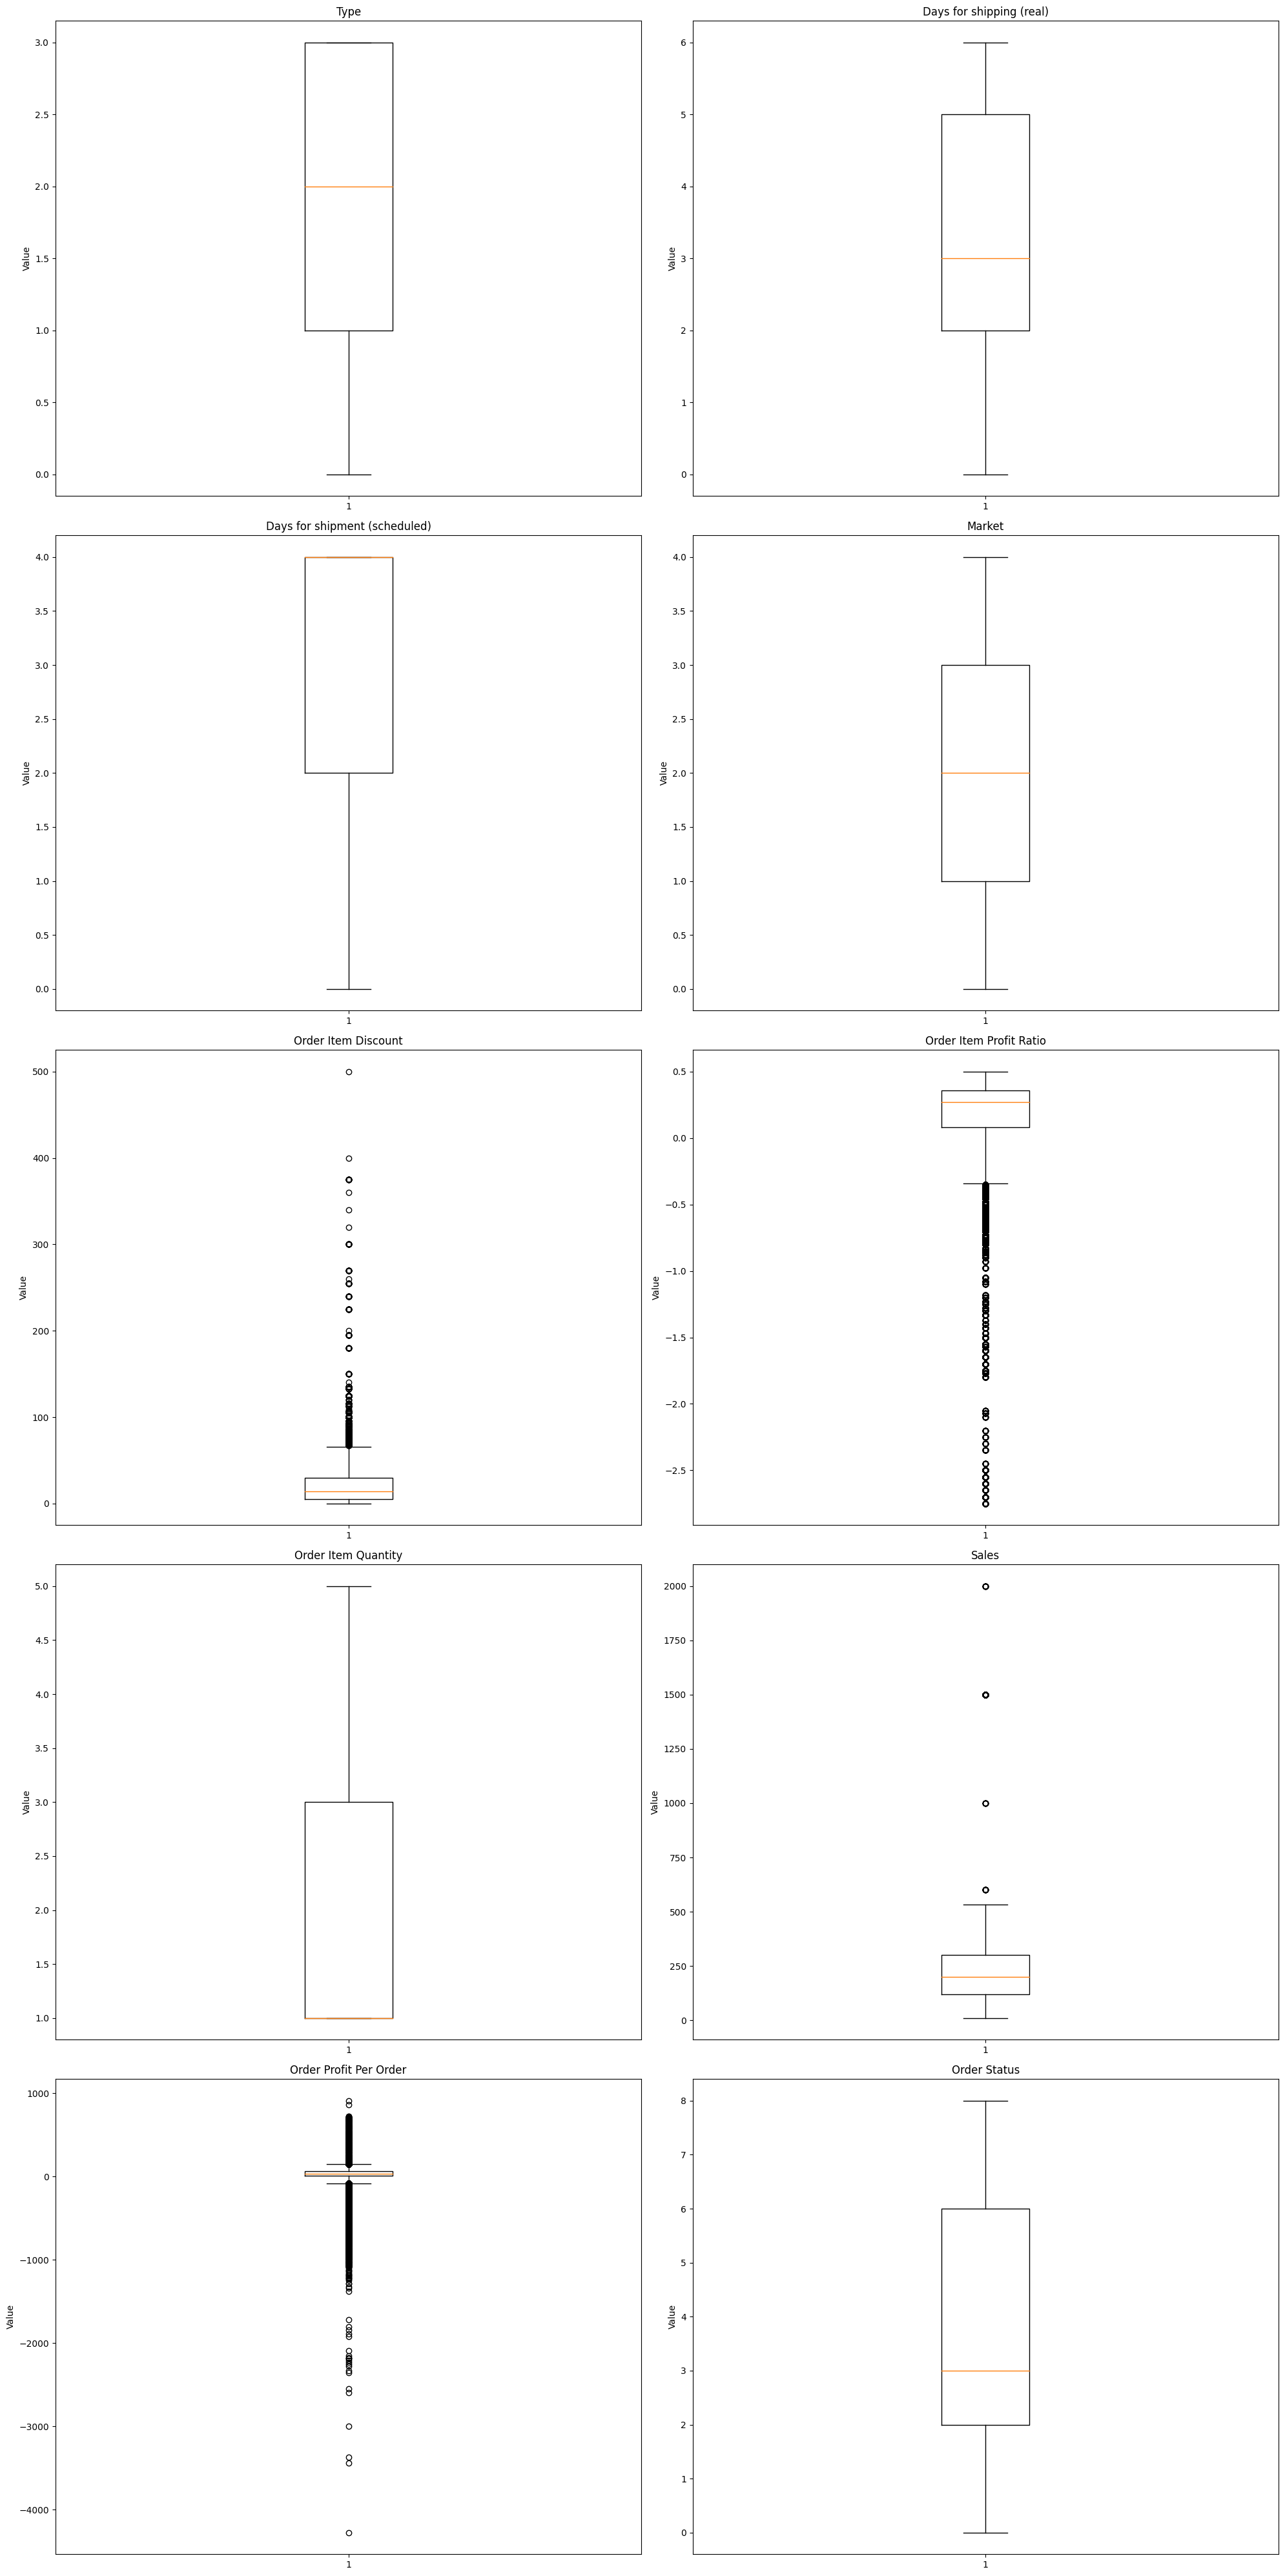

In [46]:
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    ax.boxplot(encoded_df[column].dropna())
    ax.set_title(column)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

<h1>Normalizing Data using Decimal Scaling

In [47]:
y = encoded_df['Days for shipping (real)']
X = encoded_df.drop('Days for shipping (real)',axis=1)

In [48]:
def decimal_scaling(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            max_val = df[col].abs().max()
            factor = 10 ** len(str(int(max_val)))
            df[col] = df[col] / factor
    return df

X = decimal_scaling(X)
X

,Type,Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,Customer Segment,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Price,Product Status,Shipping Mode,Customer Full Name
0,0.1,0.4,0.009125,0.031464,0.0,0.0,0.73,0.40,0.20755,0.0,...,0.009125,0.15,0.0475,0.2,0.1360,0.73,0.032775,0.0,0.3,0.01876
1,0.3,0.4,-0.024909,0.031136,0.1,0.1,0.73,0.40,0.19492,0.0,...,-0.024909,0.13,0.0841,0.5,0.1360,0.73,0.032775,0.0,0.3,0.05378
2,0.0,0.4,-0.024778,0.030972,0.3,0.0,0.73,0.40,0.19491,0.0,...,-0.024778,0.13,0.0841,0.1,0.1360,0.73,0.032775,0.0,0.3,0.04429
3,0.1,0.4,0.002286,0.030481,0.0,0.0,0.73,0.40,0.19490,0.2,...,0.002286,0.11,0.0835,0.2,0.1360,0.73,0.032775,0.0,0.3,0.12929
4,0.2,0.4,0.013421,0.029825,0.0,0.0,0.73,0.40,0.19489,0.1,...,0.013421,0.11,0.0835,0.6,0.1360,0.73,0.032775,0.0,0.3,0.10638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0.0,0.4,0.004000,0.039998,0.3,0.0,0.45,0.18,0.01005,0.2,...,0.004000,0.07,0.0914,0.1,0.1004,0.45,0.039998,0.0,0.3,0.08426
180515,0.1,0.2,-0.061377,0.039598,0.1,0.1,0.45,0.18,0.09141,0.1,...,-0.061377,0.07,0.0770,0.2,0.1004,0.45,0.039998,0.0,0.2,0.11679
180516,0.3,0.4,0.014111,0.039198,0.1,0.1,0.45,0.18,0.00291,0.1,...,0.014111,0.11,0.0088,0.5,0.1004,0.45,0.039998,0.0,0.3,0.06300
180517,0.2,0.4,0.018623,0.038798,0.0,0.0,0.45,0.18,0.02813,0.0,...,0.018623,0.11,0.0088,0.6,0.1004,0.45,0.039998,0.0,0.3,0.09384


In [49]:
y

0         3
1         5
2         4
3         3
4         2
         ..
180514    4
180515    3
180516    5
180517    3
180518    4
Name: Days for shipping (real), Length: 180519, dtype: int64

In [50]:
y.unique()

array([3, 5, 4, 2, 6, 0, 1])

In [51]:
y.value_counts()

Days for shipping (real)
2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: count, dtype: int64

<h3> Used SMOTE, NearMiss, ADASYN but did'nt work</h3>
<p> SMOTE introduces a trade-off between precision and recall. By increasing the number of minority class, SMOTE can improve model's ability to recall actual minority but the introduced synthetic data might not perfectly represent real data, hence the model may incorrectly classify them, which decreases precision. Also SMOTE adds noise to the data by generating synthetic data hence it doesn't always increases the accuracy.

In [52]:
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import ADASYN , SMOTE
# from imblearn.under_sampling import NearMiss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X_train, y_train)

# adasyn = ADASYN(random_state=42)
# X_res, y_res = adasyn.fit_resample(X_train, y_train)

# nm = NearMiss()
# X_res, y_res = nm.fit_resample(X_train, y_train)

In [53]:
# y_res.value_counts()

In [54]:
# print(len(y_res))
# print(len(X_res))

<h1>Model Training

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [56]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': LGBMClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Perceptron': Perceptron()
}
# logistic QDA MNB

In [57]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score

model_scores = {}  

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(f'{name}:')
    print(f'  Accuracy Score: {acc_score}\n')
    model_scores[name] = acc_score  # Storing model name and accuracy score

# Plotting bar chart using Plotly
fig = go.Figure([go.Bar(x=list(model_scores.keys()), y=list(model_scores.values()))])
fig.update_layout(title='Accuracy Scores of Models',
                  xaxis_title='Model Name',
                  yaxis_title='Accuracy Score')
fig.show()

Decision Tree:
  Accuracy Score: 0.9029470418790162

Random Forest:
  Accuracy Score: 0.905716818081099

K-Nearest Neighbors:
  Accuracy Score: 0.6503434522490583

Naive Bayes:
  Accuracy Score: 0.5897407489474851

Linear Discriminant Analysis:
  Accuracy Score: 0.5933968535342344

XGBoost:
  Accuracy Score: 0.7867272324396188

Learning rate set to 0.102582
0:	learn: 1.6159672	total: 235ms	remaining: 3m 54s
1:	learn: 1.4262705	total: 384ms	remaining: 3m 11s
2:	learn: 1.2907001	total: 549ms	remaining: 3m 2s
3:	learn: 1.1865337	total: 714ms	remaining: 2m 57s
4:	learn: 1.1032565	total: 871ms	remaining: 2m 53s
5:	learn: 1.0366728	total: 1.02s	remaining: 2m 49s
6:	learn: 0.9793780	total: 1.17s	remaining: 2m 46s
7:	learn: 0.9309113	total: 1.32s	remaining: 2m 43s
8:	learn: 0.8903830	total: 1.49s	remaining: 2m 43s
9:	learn: 0.8554015	total: 1.63s	remaining: 2m 41s
10:	learn: 0.8248144	total: 1.79s	remaining: 2m 41s
11:	learn: 0.7975746	total: 1.95s	remaining: 2m 40s
12:	learn: 0.7737220	total:

<h3> Randomized Search CV for top 2 models : Decision Trees and Random Forests

In [58]:
# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# dt_classifier = DecisionTreeClassifier()

# param_dist = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': randint(1, 20), 
#     'min_samples_split': randint(2, 20), 
#     'min_samples_leaf': randint(1, 20), 
#     'max_features': ['auto', 'sqrt', 'log2', None],
# #     'random_state': [42]
# }

# random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# random_search.fit(X, y)

# print("Best Parameters:", random_search.best_params_)

In [59]:
# rf_classifier = RandomForestClassifier()

# param_dist = {
#     'n_estimators': randint(10, 200),  
#     'criterion': ['gini', 'entropy'],
#     'max_depth': randint(1, 20), 
#     'min_samples_split': randint(2, 20),  
#     'min_samples_leaf': randint(1, 20),  
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'random_state': [42]
# }

# random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# random_search.fit(X, y)

# print("Best Parameters:", random_search.best_params_)

In [60]:
dt_classifier = DecisionTreeClassifier(criterion='gini',
                                       max_depth=18, 
                                       max_features=None,
                                       min_samples_leaf=1,
                                       min_samples_split=12,
                                       splitter='random', 
                                       random_state=42)

rf_classifier = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=14, 
                                         max_features='auto', min_samples_leaf=11, 
                                         min_samples_split=19, n_estimators=170, 
                                         random_state=42)

In [61]:
from sklearn.ensemble import VotingClassifier

ensemble_classifier = VotingClassifier(estimators=[
    ('dt', dt_classifier),
    ('rf', rf_classifier)
], voting='hard')

In [62]:
ensemble_classifier.fit(X_train, y_train)

y_pred = ensemble_classifier.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



In [63]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred,output_dict=True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       466
           1       1.00      0.99      0.99       459
           2       0.82      0.94      0.87      5660
           3       0.67      0.49      0.57      2831
           4       0.84      0.89      0.86      2845
           5       0.60      0.73      0.66      2865
           6       0.73      0.49      0.59      2926

    accuracy                           0.76     18052
   macro avg       0.81      0.79      0.79     18052
weighted avg       0.76      0.76      0.75     18052



,0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.991453,0.995624,0.815007,0.666188,0.840411,0.601489,0.726582,0.760193,0.805251,0.756600
recall,0.995708,0.991285,0.944170,0.491346,0.890334,0.733333,0.490431,0.760193,0.790944,0.760193
f1-score,0.993576,0.993450,0.874847,0.565562,0.864653,0.660900,0.585595,0.760193,0.791226,0.749978
support,466.000000,459.000000,5660.000000,2831.000000,2845.000000,2865.000000,2926.000000,0.760193,18052.000000,18052.000000


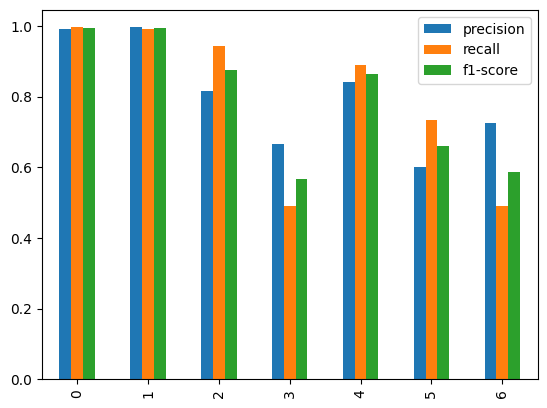

In [64]:
from IPython import display

display.display(pd.DataFrame(report))
df = pd.DataFrame(report)
df.iloc[:3, :7].T.plot(kind='bar')    
plt.show()

<h1> Why Ensemble Learning did'nt work?</h1>
<p> Ensemble Learning is an trial and error approach, and it doesn't always outperform the individual models. Here we ensembled DT and RF which are two complex models.It may happen that the combined complexity of these models might not capture the patterns efficiently, leading to lower accuracy. Complex Ensemble Models are often prone to overfitting. Also they are a trade-off between Performance vs. Interpretability.

<h1> Sticking to single model : Decision Trees </h1>
<p> Given that both models give the same accuracy we would like to proceed with Decision trees due to their simple structure compared to Random Forests. Also there are faster and more computationally efficient. Due to their simpler structure they are less prone to overfitting compared to the Random Forests.

In [65]:
model = DecisionTreeClassifier()

In [66]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import classification_report

acc = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       466
           1       0.99      0.99      0.99       459
           2       0.94      0.94      0.94      5660
           3       0.83      0.83      0.83      2831
           4       0.96      0.96      0.96      2845
           5       0.86      0.87      0.86      2865
           6       0.87      0.86      0.86      2926

    accuracy                           0.90     18052
   macro avg       0.92      0.92      0.92     18052
weighted avg       0.90      0.90      0.90     18052



,0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.993562,0.993464,0.938141,0.830742,0.955774,0.861207,0.867263,0.903224,0.920022,0.903216
recall,0.993562,0.993464,0.937809,0.830449,0.957118,0.866318,0.861928,0.903224,0.920092,0.903224
f1-score,0.993562,0.993464,0.937975,0.830595,0.956445,0.863755,0.864587,0.903224,0.920055,0.903217
support,466.000000,459.000000,5660.000000,2831.000000,2845.000000,2865.000000,2926.000000,0.903224,18052.000000,18052.000000


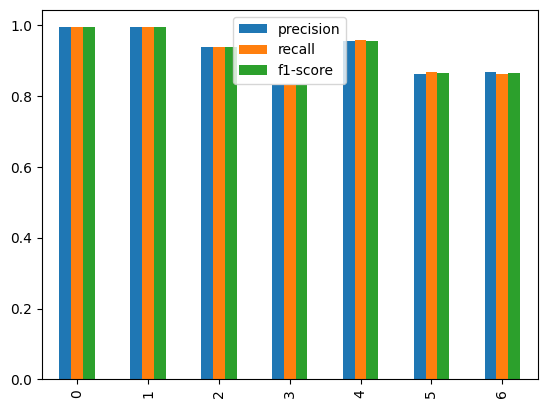

In [68]:
from IPython import display

display.display(pd.DataFrame(report))
df = pd.DataFrame(report)
df.iloc[:3,:7].T.plot(kind='bar')
plt.show()

<h1> Lime XAI for Dimensionality Reduction

In [69]:
import lime
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(training_data=X_train.values, feature_names=X_train.columns, class_names=['0','1','2','3','4','5','6'], mode='classification')

explanation = explainer.explain_instance(X_train.iloc[0], model.predict_proba)

feature_importance = explanation.as_list()

/opt/conda/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/conda/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning:

Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`

/opt/conda/lib/python3.10/site-packages/lime/lime_tabular.py:544: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid fe

In [70]:
feature_importance

[('Days for shipment (scheduled) <= 0.20', 0.19220363525856032),
 ('0.00 < Late_delivery_risk <= 0.10', 0.13891546682963285),
 ('Shipping Mode <= 0.20', -0.020634859207631816),
 ('Order Item Profit Ratio > 0.04', 0.019520072363435666),
 ('0.29 < Category Id <= 0.45', 0.01563109142356538),
 ('0.30 < Order Status <= 0.60', -0.015174119793567599),
 ('0.12 < Category Name <= 0.30', -0.01440729600034479),
 ('Customer Id > 0.10', -0.013600490700496931),
 ('0.01 < Sales <= 0.02', -0.013159354454305671),
 ('0.05 < Department Id <= 0.07', -0.012283529910456696)]

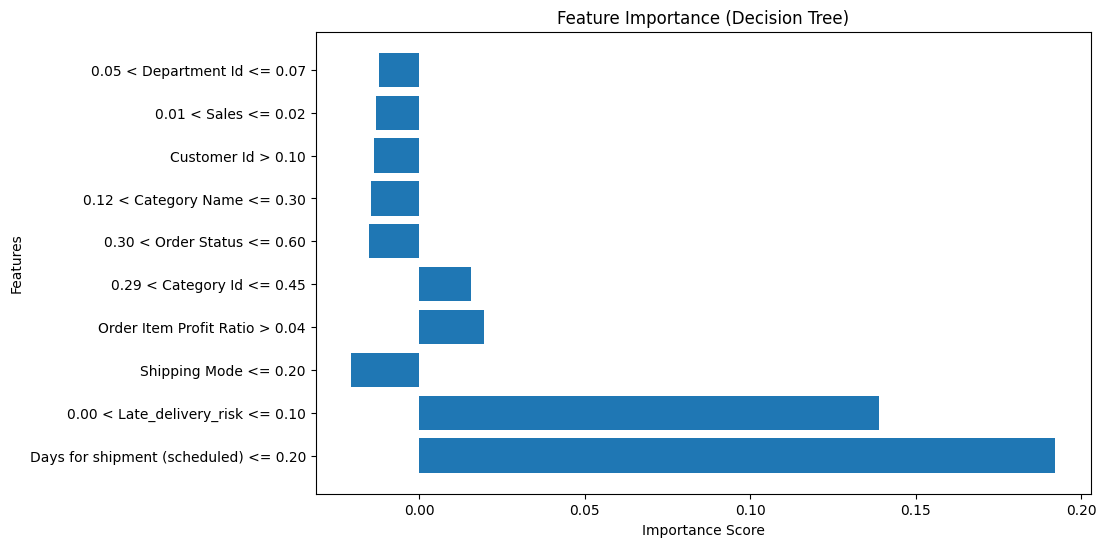

In [71]:
features, scores = zip(*feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(features, scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Decision Tree)')
plt.show()

<h1> Epoch : 2

In [72]:
model1 = DecisionTreeClassifier()

In [73]:
X_train_new = X_train.drop(['Latitude','Delivery Status','Shipping Mode','Customer Id','Longitude','Market','Benefit per order'],axis=1)
X_test_new = X_test.drop(['Latitude','Delivery Status','Shipping Mode','Customer Id','Longitude','Market','Benefit per order'],axis=1)

In [74]:
X_train_new

,Type,Days for shipment (scheduled),Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer Segment,Customer Zipcode,Department Id,Order Customer Id,...,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Price,Product Status,Customer Full Name
59128,0.2,0.1,0.015933,0.1,0.37,0.17,0.0,0.00725,0.06,0.10455,...,0.015933,0.007329,0.10,0.0355,0.6,0.0818,0.37,0.004799,0.0,0.07162
143696,0.0,0.1,0.008497,0.1,0.46,0.30,0.0,0.00957,0.07,0.01755,...,0.008497,0.003739,0.17,0.0565,0.1,0.1014,0.46,0.004998,0.0,0.09384
180216,0.1,0.4,0.036398,0.0,0.45,0.18,0.1,0.84118,0.07,0.04974,...,0.036398,0.002730,0.11,0.1033,0.2,0.1004,0.45,0.039998,0.0,0.09384
126235,0.2,0.2,0.025196,0.1,0.17,0.12,0.0,0.00725,0.04,0.11895,...,0.025196,-0.010078,0.21,0.0188,0.6,0.0365,0.17,0.005999,0.0,0.13183
63026,0.0,0.2,0.004799,0.1,0.17,0.12,0.2,0.30047,0.04,0.00731,...,0.004799,0.001022,0.07,0.0914,0.1,0.0365,0.17,0.005999,0.0,0.11636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.3,0.2,0.026096,0.1,0.17,0.12,0.0,0.06460,0.04,0.10587,...,0.026096,0.004436,0.03,0.0616,0.5,0.0365,0.17,0.005999,0.0,0.09384
103694,0.3,0.4,0.019799,0.0,0.48,0.46,0.0,0.20783,0.07,0.09571,...,0.019799,0.003227,0.22,0.0462,0.8,0.1073,0.48,0.019999,0.0,0.08036
131932,0.0,0.1,0.009596,0.1,0.46,0.30,0.0,0.60615,0.07,0.12414,...,0.009596,0.004606,0.15,0.0475,0.1,0.1014,0.46,0.004998,0.0,0.09495
146867,0.1,0.2,0.039598,0.1,0.45,0.18,0.1,0.00725,0.07,0.00443,...,0.039598,0.010295,0.20,0.0964,0.2,0.1004,0.45,0.039998,0.0,0.01182


In [75]:
model1.fit(X_train_new,y_train)
y_pred1 = model1.predict(X_test_new)

In [76]:
from sklearn.metrics import classification_report

acc = accuracy_score(y_test,y_pred1)
report = classification_report(y_test,y_pred1,output_dict=True)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       466
           1       0.99      1.00      1.00       459
           2       0.93      0.92      0.92      5660
           3       0.81      0.81      0.81      2831
           4       0.80      0.82      0.81      2845
           5       0.84      0.85      0.84      2865
           6       0.84      0.84      0.84      2926

    accuracy                           0.87     18052
   macro avg       0.89      0.89      0.89     18052
weighted avg       0.87      0.87      0.87     18052



In [77]:
import lime
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(training_data=X_train_new.values, feature_names=X_train_new.columns, class_names=['1','2','3','4','5','6'], mode='classification')

explanation = explainer.explain_instance(X_train_new.iloc[0], model1.predict_proba)

feature_importance = explanation.as_list()

/opt/conda/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/conda/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning:

Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`

/opt/conda/lib/python3.10/site-packages/lime/lime_tabular.py:544: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid fe

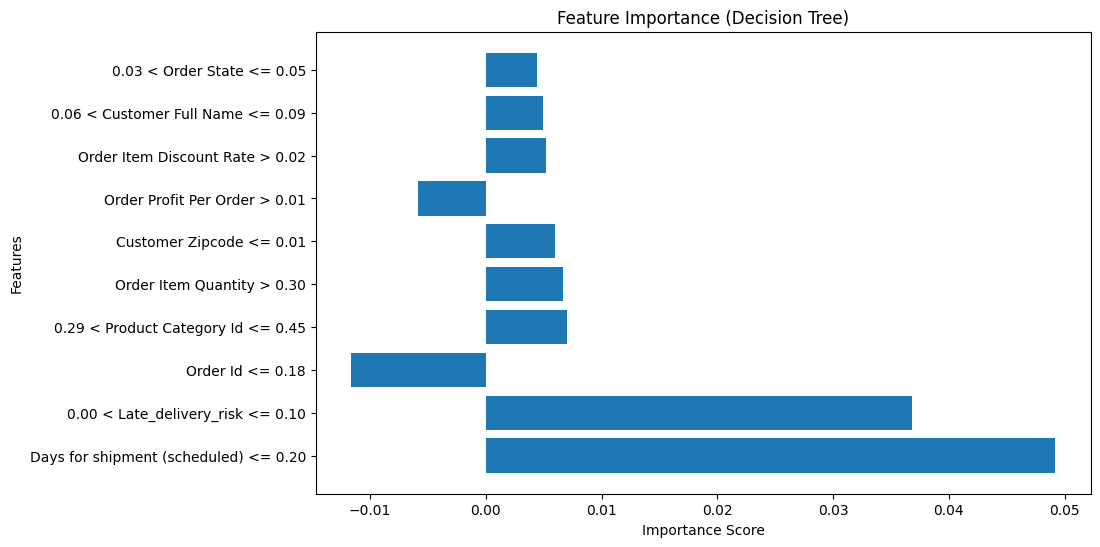

In [78]:
features, scores = zip(*feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(features, scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Decision Tree)')
plt.show()

<h1> Epoch : 3

In [79]:
X_train_new = X_train_new.drop(['Product Price','Order Profit Per Order'],axis=1)
X_test_new = X_test_new.drop(['Product Price','Order Profit Per Order'],axis=1)

In [80]:
model1.fit(X_train_new,y_train)
y_pred1 = model1.predict(X_test_new)

In [81]:
from sklearn.metrics import classification_report

acc = accuracy_score(y_test,y_pred1)
report = classification_report(y_test,y_pred1,output_dict=True)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       459
           2       0.93      0.93      0.93      5660
           3       0.83      0.82      0.83      2831
           4       0.82      0.82      0.82      2845
           5       0.85      0.86      0.85      2865
           6       0.85      0.85      0.85      2926

    accuracy                           0.88     18052
   macro avg       0.90      0.90      0.90     18052
weighted avg       0.88      0.88      0.88     18052



In [82]:
import lime
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(training_data=X_train_new.values, feature_names=X_train_new.columns, class_names=['1','2','3','4','5','6'], mode='classification')

explanation = explainer.explain_instance(X_train_new.iloc[0], model1.predict_proba)

feature_importance = explanation.as_list()

/opt/conda/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/conda/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning:

Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`

/opt/conda/lib/python3.10/site-packages/lime/lime_tabular.py:544: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid fe

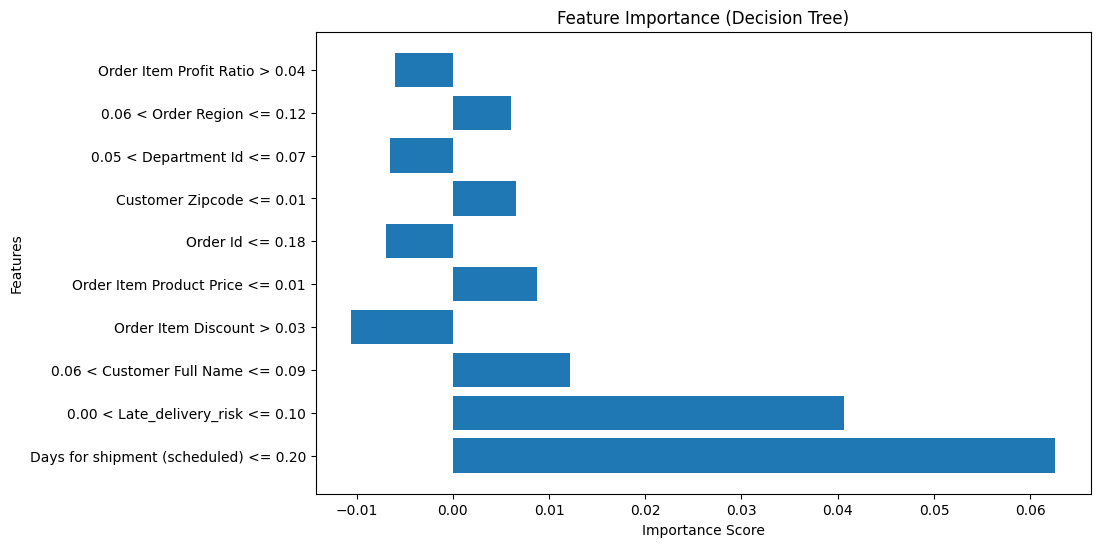

In [83]:
features, scores = zip(*feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(features, scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Decision Tree)')
plt.show()

In [84]:
X_train_new = X_train_new.drop(['Order Id','Order Customer Id','Category Name','Order Status','Category Id','Order Item Quantity'],axis=1)
X_test_new = X_test_new.drop(['Order Id','Order Customer Id','Category Name','Order Status','Category Id','Order Item Quantity'],axis=1)

In [85]:
model1.fit(X_train_new,y_train)
y_pred1 = model1.predict(X_test_new)

In [86]:
from sklearn.metrics import classification_report

acc = accuracy_score(y_test,y_pred1)
report = classification_report(y_test,y_pred1,output_dict=True)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       466
           1       0.99      0.99      0.99       459
           2       0.91      0.91      0.91      5660
           3       0.77      0.77      0.77      2831
           4       0.77      0.76      0.76      2845
           5       0.80      0.81      0.81      2865
           6       0.81      0.80      0.81      2926

    accuracy                           0.84     18052
   macro avg       0.86      0.86      0.86     18052
weighted avg       0.84      0.84      0.84     18052



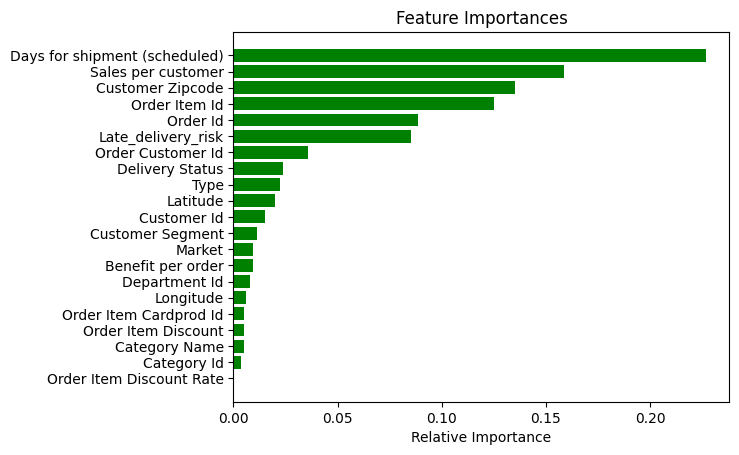

In [87]:
importances = model1.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()